In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

basic = pd.read_csv('data/basic.csv')
basic

,Unnamed: 0,id,title,overview,genres,belongs_to_collection,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,keywords
0,0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","('Animation', 'Comedy', 'Family')",Toy Story Collection,en,21.946943,"('Pixar Animation Studios',)","('United States of America',)",1995-10-30,81.0,"('English',)",Released,NaN,7.7,5415,"('Annie Potts', 'Don Rickles', 'Erik von Dette...","('Ada Cochavi', 'Alan Sperling', 'Alec Sokolow...","('boy', 'boy next door', 'friends', 'friendshi..."
1,1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"('Adventure', 'Family', 'Fantasy')",NaN,en,17.015539,"('Interscope Communications', 'Teitler Film', ...","('United States of America',)",1995-12-15,104.0,"('English', 'Français')",Released,Roll the dice and unleash the excitement!,6.9,2413,"('Adam Hann-Byrd', 'Annabel Kershaw', 'Bebe Ne...","('Chris van Allsburg', 'Greg Taylor', 'James D...","(""based on children's book"", 'board game', 'di..."
2,2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"('Comedy', 'Romance')",Grumpy Old Men Collection,en,11.712900,"('Lancaster Gate', 'Warner Bros.')","('United States of America',)",1995-12-22,101.0,"('English',)",Released,Still Yelling. Still Fighting. Still Ready for...,6.5,92,"('Ann-Margret', 'Burgess Meredith', 'Daryl Han...","('Howard Deutch', 'Jack Keller', 'Mark Steven ...","('best friend', 'duringcreditsstinger', 'fishi..."
3,3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","('Comedy', 'Drama', 'Romance')",NaN,en,3.859495,"('Twentieth Century Fox Film Corporation',)","('United States of America',)",1995-12-22,127.0,"('English',)",Released,Friends are the people who let you be yourself...,6.1,34,"('Angela Bassett', 'Dennis Haysbert', 'Gregory...","('Caron K', 'Deborah Schindler', 'Ezra Swerdlo...","('based on novel', 'chick flick', 'divorce', '..."
4,4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"('Comedy',)",Father of the Bride Collection,en,8.387519,"('Sandollar Productions', 'Touchstone Pictures')","('United States of America',)",1995-02-10,106.0,"('English',)",Released,Just When His World Is Back To Normal... He's ...,5.7,173,"('BD Wong', 'Diane Keaton', 'Eugene Levy', 'Ge...","('Adam Bernardi', 'Alan Silvestri', 'Albert Ha...","('aging', 'baby', 'confidence', 'contraception..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45454,45454,439050,Subdue,Rising and falling between a man and woman.,"('Drama', 'Family')",NaN,fa,0.072051,(),"('Iran',)",NaN,90.0,"('فارسی',)",Released,Rising and falling between a man and woman,4.0,1,"('Elham Korda', 'Kourosh Tahami', 'Leila Hatami')","('Azadeh Ghavam', 'Babak Ardalan', 'Farshad Mo...","('tragic love',)"
45455,45455,111109,Century of Birthing,An artist struggles to finish his work while a...,"('Drama',)",NaN,tl,0.178241,"('Sine Olivia',)","('Philippines',)",2011-11-17,360.0,"('',)",Released,NaN,9.0,3,"('Angel Aquino', 'Angeli Bayani', 'Bart Guingo...","('Dante Perez', 'Lav Diaz', 'Lav Diaz', 'Lav D...","('artist', 'pinoy', 'play')"
45456,45456,67758,Betrayal,"When one of her hits goes wrong, a professiona...","('Action', 'Drama', 'Thriller')",NaN,en,0.903007,"('American World Pictures',)","('United States of America',)",2003-08-01,90.0,"('English',)",Released,A deadly game of wits.,3.8,6,"('Adam Baldwin', 'Damian Chapa', 'Darrell Dubo...","('C. Courtney Joyner', 'Jeffrey Goldenberg', '...",()
45457,45457,227506,Satan Triumphant,"In a small town live two brothers, one a minis...",(),NaN,en,0.003503,"('Yermoliev',)","('Russia',)",1917-10-21,87.0,(),Released,NaN,0.0,0,"('Aleksandr Chabrov', 'Iwan Mosschuchin', 'Nat...","('Joseph N. Ermolieff', 'Yakov Protazanov')",()


In [70]:
from ast import literal_eval

df = basic[['id', 'title', 'keywords']]
df.loc[:, 'keywords'] = df['keywords'].apply(literal_eval)
df

,id,title,keywords
0,862,Toy Story,"(boy, boy next door, friends, friendship, jeal..."
1,8844,Jumanji,"(based on children's book, board game, disappe..."
2,15602,Grumpier Old Men,"(best friend, duringcreditsstinger, fishing, o..."
3,31357,Waiting to Exhale,"(based on novel, chick flick, divorce, interra..."
4,11862,Father of the Bride Part II,"(aging, baby, confidence, contraception, daugh..."
...,...,...,...
45454,439050,Subdue,"(tragic love,)"
45455,111109,Century of Birthing,"(artist, pinoy, play)"
45456,67758,Betrayal,()
45457,227506,Satan Triumphant,()


In [71]:
keywords = df['keywords']
keywords

0        (boy, boy next door, friends, friendship, jeal...
1        (based on children's book, board game, disappe...
2        (best friend, duringcreditsstinger, fishing, o...
3        (based on novel, chick flick, divorce, interra...
4        (aging, baby, confidence, contraception, daugh...
                               ...                        
45454                                       (tragic love,)
45455                                (artist, pinoy, play)
45456                                                   ()
45457                                                   ()
45458                                                   ()
Name: keywords, Length: 45459, dtype: object

(array([1.993e+04, 1.600e+01, 7.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e+00, 3.050e+02, 6.090e+02, 9.130e+02, 1.217e+03, 1.521e+03,
        1.825e+03, 2.129e+03, 2.433e+03, 2.737e+03, 3.041e+03]),
 <BarContainer object of 10 artists>)

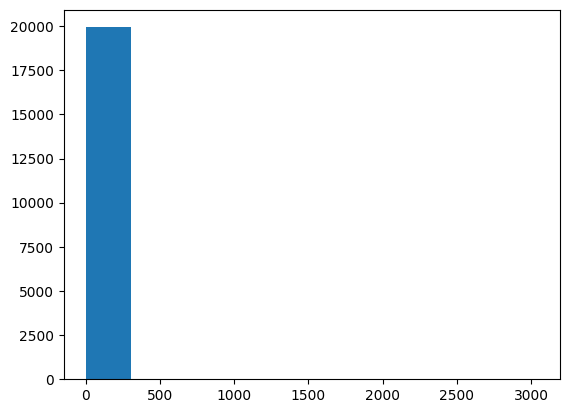

In [72]:
from collections import defaultdict

counts = defaultdict(int)
for kwrds in keywords:
    for kwrd in kwrds:
        counts[kwrd] += 1

plt.hist(counts.values())

In [73]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
df.loc[:, 'keywords'] = df['keywords'].apply(lambda x: " ".join([stemmer.stem(kwrd).replace(" ", "").lower() for kwrd in x]))
df

,id,title,keywords
0,862,Toy Story,boy boynextdoor friend friendship jealousi new...
1,8844,Jumanji,basedonchildren'sbook boardgam disappear giant...
2,15602,Grumpier Old Men,bestfriend duringcreditssting fish oldmen
3,31357,Waiting to Exhale,basedonnovel chickflick divorc interracialrela...
4,11862,Father of the Bride Part II,age babi confid contracept daughter gynecologi...
...,...,...,...
45454,439050,Subdue,tragiclov
45455,111109,Century of Birthing,artist pinoy play
45456,67758,Betrayal,
45457,227506,Satan Triumphant,


In [74]:
from sklearn.feature_extraction.text import CountVectorizer

cntvec = CountVectorizer(stop_words='english', strip_accents='unicode')
cntvec_matrix = cntvec.fit_transform(df['keywords'])

cntvec_matrix.shape

(45459, 18909)

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

def get_index(id):
    return df[df['id'] == id].index[0]

def get_similarities(id):
    return cosine_similarity(cntvec_matrix, cntvec_matrix[get_index(id)]).reshape(-1)

def get_id(index):
    return df.loc[index]['id']

def get_similar(id):
    return np.argsort(get_similarities(id))[-10:][::-1]

def get_id_from_title(title):
    return df[df['title'] == title]['id'].values[0]


In [76]:
df.iloc[get_similar(get_id_from_title('Batman'))]

,id,title,keywords
585,268,Batman,chemic crimefight dccomic doublelif dualident ...
1491,415,Batman & Robin,creditcard crimefight dccomic doublelif dualid...
40940,411736,Batman: Return of the Caped Crusaders,dccomic superpow superhero
31454,323027,Justice League: Gods and Monsters,dccomic superpow superhero
12461,14011,Justice League: The New Frontier,basedoncom dccomic superpow superhero
32115,342917,Batman Unlimited: Monster Mayhem,dccomic joker superpow superhero
14131,17445,Green Lantern: First Flight,dccomic superpow superhero womandirector
16626,56590,All Star Superman,dccomic superpow superhero superhumanstrength
44332,146072,The Underground World,superpow superhero
5053,44004,Hero at Large,crimefight superhero


In [79]:
df.iloc[get_similar(get_id_from_title('The Godfather'))]

,id,title,keywords
834,238,The Godfather,1940s crimefamili italianamerican itali lawyer...
549,41590,Trial by Jury,mobboss organizedcrim
41133,403450,At War with Love,itali mafia war
12113,13197,10th & Wolf,crimefamili mafia mobster undercov
11624,24653,The Consequences of Love,itali loneli mafia switzerland
33456,58658,The Day of the Owl,mafia
4167,32924,Catchfire,mafia
26542,61462,The Italian Connection,mafia
16038,53792,Counsellor at Law,lawyer
33592,46565,Torino nera,mafia


In [77]:
df.iloc[get_similar(24428)] # The Avengers

,id,title,keywords
17818,24428,The Avengers,aftercreditssting alieninvas basedoncom during...
26560,102899,Ant-Man,3d aftercreditssting basedoncom duringcreditss...
23051,100402,Captain America: The Winter Soldier,3d aftercreditssting basedoncom captainamerica...
26556,99861,Avengers: Age of Ultron,3d basedoncom duringcreditssting marvelcinemat...
21939,76338,Thor: The Dark World,3d aftercreditssting asgard basedoncom duringc...
15153,10138,Iron Man 2,aftercreditssting basedoncom malibu marvelcine...
26566,284052,Doctor Strange,aftercreditssting basedoncom doctor duringcred...
26565,271110,Captain America: Civil War,3d aftercreditssting basedoncom civilwar durin...
30885,284274,Iron Man & Captain America: Heroes United,basedoncom marvelcom superhero
23062,257346,Avengers Confidential: Black Widow & Punisher,basedoncom marvelcom superhero
